# Interval 1: ROI 1

In [1]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np

import astropy
from astropy.visualization import ImageNormalize, SqrtStretch, PowerStretch
from astropy.io import fits
import astropy.units as u
from astropy.coordinates import SkyCoord

import sunpy.map
import sunpy_soar
from sunpy.net import Fido, attrs as a
from sunpy.map import make_fitswcs_header
from sunpy.coordinates import propagate_with_solar_surface

import skimage
import scipy

import glob
import os
import shutil
from copy import deepcopy
import pickle
from pathlib import Path
import math

from tqdm import tqdm

from scipy.signal import savgol_filter

from matplotlib.animation import PillowWriter

from sunpy.net.jsoc import JSOCClient

/opt/anaconda3/envs/REU2025_py39/lib/python3.10/site-packages/requests/__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


### Define function to read in saved pickle files

In [7]:
# define read-in function
def read_from_pickle_chunks(base_filename, num_parts):
    all_data = []

    for i in range(1, num_parts + 1):
        part_file = Path(f"{base_filename}_part{i}.pickle")
        with open(part_file, "rb") as f:
            chunk = pickle.load(f)
            all_data.extend(chunk)

    return sunpy.map.Map(all_data, sequence=True)

Read in pickle files from "Interval_1"...

In [8]:
# projection information
aia171_aligned = read_from_pickle_chunks('aia171_data_interval1', 10)
aia1700_aligned = read_from_pickle_chunks('aia1700_data_interval1', 5)
iris1400_aligned = read_from_pickle_chunks('iris1400_data_interval1', 3)
eui_aligned = read_from_pickle_chunks('eui174_data_interval1', 4)

# time information
aia171_matched = read_from_pickle_chunks('aia171_matched_interval1', 10)
aia1700_matched = read_from_pickle_chunks('aia1700_matched_interval1', 5)
iris1400_matched = read_from_pickle_chunks('iris1400_matched_interval1', 3)
eui174_matched = read_from_pickle_chunks('eui174_matched_interval1', 4)

View side-by-side movie for ROI 1...

![SegmentLocal](gifs/eui_and_iris_interval1.gif "Aligned EUI 174 and IRIS 1400")

View frame-by-frame...

In [10]:
# define norms
eui_norm = ImageNormalize(eui_map.data, vmin=300, vmax=1500, stretch=SqrtStretch())
iris_norm = ImageNormalize(iris_map.data, vmin=0, vmax=15, stretch=SqrtStretch())

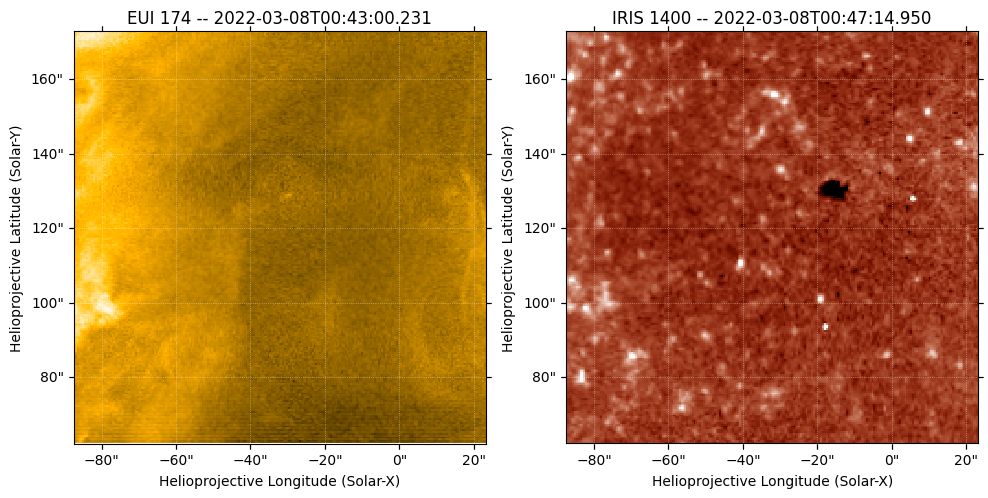

In [14]:
i = 0 # adjust i to choose frame; i = [0, 359]

eui_map = eui_aligned[i]
iris_map = iris1400_aligned[i]

fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(121, projection=eui_map)
eui_map.plot(axes=ax1, norm=eui_norm, title=f'EUI 174 -- {eui174_matched[i].date}')

ax2 = fig.add_subplot(122, projection=iris_map, sharex=ax1, sharey=ax1)
iris_map.plot(axes=ax2, norm=iris_norm, title=f'IRIS 1400 -- {iris1400_matched[i].date}')

ax1.set_xlim(25, 250)
ax1.set_ylim(25, 250)

plt.tight_layout()

### Record coordinates and times of EUI brightenings

In [18]:
# define function for updating maps
def show_frame(i):
    eui_map = eui_aligned[i]
    iris_map = iris1400_aligned[i]
    
    fig = plt.figure(figsize=(10, 5))

    ax1 = fig.add_subplot(121, projection=eui_map.wcs)
    eui_map.plot(axes=ax1, norm=eui_norm, title=f'EUI 174 -- {eui174_matched[i].date}')

    ax2 = fig.add_subplot(122, projection=iris_map.wcs, sharex=ax1, sharey=ax1)
    iris_map.plot(axes=ax2, norm=iris_norm, title=f'IRIS 1400 -- {iris1400_matched[i].date}')

    ax1.set_xlim(25, 250)
    ax1.set_ylim(25, 250)

    plt.tight_layout()
    plt.show()

# create slider widget
interact(show_frame, i=widgets.IntSlider(min=0, max=len(eui_aligned)-1, step=1, value=0))

interactive(children=(IntSlider(value=0, description='i', max=359), Output()), _dom_classes=('widget-interact'…

<function __main__.show_frame(i)>